In [5]:
import urllib.request
from bs4 import BeautifulSoup
import json
from race import Scrape

In [3]:
p = "./racer_codes.json"
with open(p, "r", encoding="utf-8") as f:
  read_dic = json.load(f)
read_dic

{'青山周平': '3101',
 '鈴木圭一郎': '3206',
 '早川清太郎': '2926',
 '伊藤信夫': '2404',
 '木村武之': '2606',
 '中村雅人': '2816',
 '荒尾聡': '2703',
 '永井大介': '2519',
 '佐々木啓': '2310',
 '高橋貢': '2215',
 '金子大輔': '2910',
 '佐藤貴也': '2913',
 '篠原睦': '2612',
 '若井友和': '2532',
 '佐藤摩弥': '9002',
 '森且行': '2529',
 '松尾啓史': '2622',
 '浦田信輔': '2306',
 '佐藤裕二': '2410',
 '新井恵匠': '3002',
 '丸山智史': '3115',
 '有吉辰也': '2502',
 '平田雅崇': '2927',
 '笠木美孝': '2205',
 '内山高秀': '2601',
 '岩田裕臣': '3102',
 '山田達也': '2828',
 '岩田行雄': '1503',
 '森本優佑': '3116',
 '藤岡一樹': '2928',
 '重富大輔': '2713',
 '岩見貴史': '2908',
 '青島正樹': '2201',
 '田村治郎': '3014',
 '久門徹': '2619',
 '小林瑞季': '3204',
 '丹村飛竜': '2925',
 '西村龍太郎': '2523',
 '五十嵐一夫': '2101',
 '吉原恭佑': '3215',
 '角南一如': '2719',
 '加賀谷建明': '2709',
 '鐘ヶ江将平': '3104',
 '中村友和': '3211',
 '田中茂': '2614',
 '大木光': '2806',
 '渡辺篤': '3118',
 '池田政和': '2305',
 '岩崎亮一': '2505',
 '中山光': '3212',
 '森谷隼人': '2934',
 '中野憲人': '2416',
 '三浦康平': '2825',
 '黒川京介': '3307',
 '人見剛志': '2819',
 '谷津圭治': '2517',
 '浜野淳': '2419',
 '黒岩明': '2607',
 '鈴木清': '2314',
 '岡

In [13]:
s = Scrape()
racers = ['青山周平', '鈴木圭一郎', '早川清太郎']
hand = "40m"

detail_url = "https://www.oddspark.com/autorace/PlayerDetail.do?"
cd = read_dic[racers[0]]
url = detail_url + "playerCd=" + cd

soup = s.get_soup(url)
dfs = s.get_dfs(soup)
df = dfs[8]

for i, sr in df.iterrows():
    pass
    # print(sr["H"], type(sr["H"]))

_raps = [sr["競走T"] for i, sr in df.iterrows() if sr["走路  (天候)"][0] == "良" and sr["H"] == hand.strip("m")]
raps = [rap for rap in _raps if isinstance(rap, float) and rap != 0.0]
print(raps)

[3.401, 3.379, 3.392, 3.385]


In [15]:
from laps import Laps

laps = Laps('20210817','飯塚', 9)
print(laps.raceTitle())
for tpl in laps.select_latest_laps():
    print(tpl[0], tpl[1], tpl[4], tpl[6])

準々決勝戦 2021年8月17日(火) 飯塚 9R 14:46 天候：曇 (湿)
1 宮地朗 -84.6 []
2 山本智大 -42.1 [-12.8, -24.7]
3 石橋大 -18.3 [-10.1, -12.8, 4.6, -24.7, -22.0, 4.6, -22.0, 1.8, -24.7, -27.4]
4 重富英雄 0.0 [-19.2, -4.6]
5 丹村司 -21.2 [-30.4, -27.6, 7.2, 10.0, -15.7, -15.7, -22.1]
6 林弘明 -9.3 []
7 高宗良次 -9.4 [-30.5, -1.1, -22.2, -54.5]


In [17]:
tpls = [(tpl[0], tpl[1], tpl[4], tpl[6]) for tpl in laps.select_latest_laps()]
tpls

[(1, '宮地朗', -84.6, []),
 (2, '山本智大', -42.1, [-12.8, -24.7]),
 (3,
  '石橋大',
  -18.3,
  [-10.1, -12.8, 4.6, -24.7, -22.0, 4.6, -22.0, 1.8, -24.7, -27.4]),
 (4, '重富英雄', 0.0, [-19.2, -4.6]),
 (5, '丹村司', -21.2, [-30.4, -27.6, 7.2, 10.0, -15.7, -15.7, -22.1]),
 (6, '林弘明', -9.3, []),
 (7, '高宗良次', -9.4, [-30.5, -1.1, -22.2, -54.5])]

In [36]:
tamura = tpls[4]
pos = [tamura[0] for _ in range(len(tamura[3]))]
pos

[5, 5, 5, 5, 5, 5, 5]

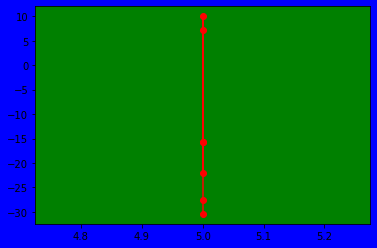

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure()  # Figure
ax = fig.add_subplot(111)  # Axes
fig.patch.set_facecolor('blue') 
ax.patch.set_facecolor('green')
plt.plot(pos, tamura[3], marker='o', color="red")
plt.show()